In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

(-0.5, 639.5, 426.5, -0.5)

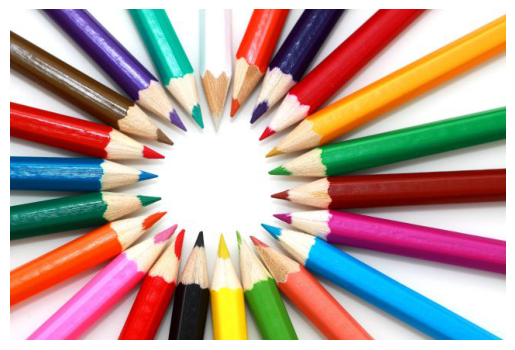

In [2]:
kredki = plt.imread('pencils.jpg')
plt.imshow(kredki)
plt.axis('off')

In [4]:
kredki_flat = kredki.reshape(-1, 3)

In [5]:
ks = range(2, 16)
inercje = []

for k in ks:
    km = KMeans(n_clusters=k).fit(kredki_flat)
    inercje.append(km.inertia_)

In [6]:
inercje_df = pd.DataFrame({'K':ks, 'Inercja' : inercje})

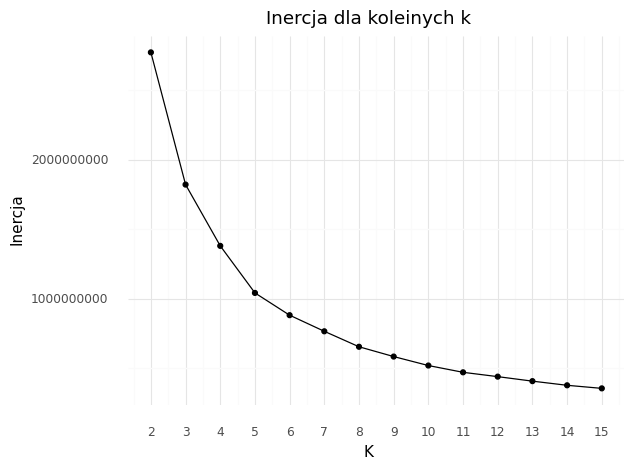

<ggplot: (105782636975)>

In [7]:
(ggplot(inercje_df, aes(x='K', y='Inercja'))+
 geom_point()+geom_line() +
 scale_x_continuous(breaks = ks)+
 theme_minimal()+
 labs(title = 'Inercja dla koleinych k'))

In [22]:
df = pd.DataFrame(kredki_flat, columns = ['x1', 'x2', 'x3'])

In [33]:
df = df.drop_duplicates()

Przy obliczeniach indeksu sylwetki ograniczyłem liczbę wierszy tylko do nie powtarzających się by zmniejszyć ilość kalkulacji potrzebnych do wykoania. Pętla wykonuje się bardzo długo dlatego na wszelki wypadek zamieszczam zdjęcie wygenerowanego wykresu.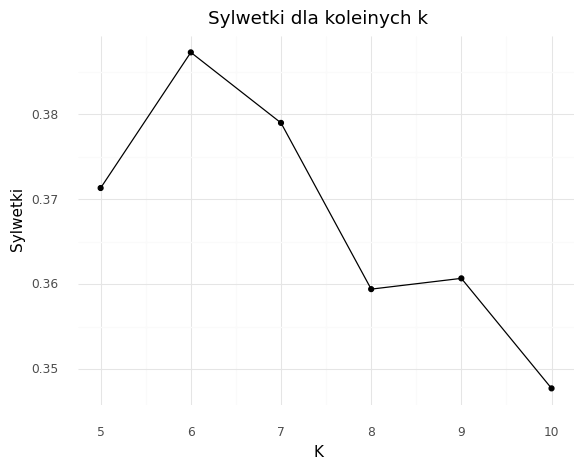

In [52]:
ks = range(5, 11)
sylwetki = []

for k in ks:
    km = KMeans(n_clusters=k).fit(df)
    sylwetki.append(silhouette_score(df, km.predict(df)))

In [53]:
sylwetki_df = pd.DataFrame({'K': ks, 'Sylwetki' : sylwetki})

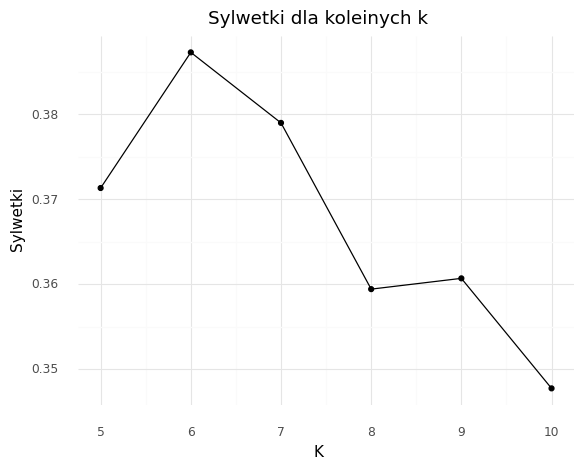

<ggplot: (105786975793)>

In [54]:
(ggplot(sylwetki_df, aes(x='K', y='Sylwetki'))+
 geom_point()+geom_line() +
 scale_x_continuous(breaks = ks)+
 theme_minimal()+
 labs(title = 'Sylwetki dla koleinych k'))

<b>Wybrana ilość Kredek ze względu na Inercje</b>

In [61]:
km = KMeans(n_clusters=9, random_state=0).fit(kredki_flat)

In [62]:
kredki_flat9 = kredki_flat.copy()

In [63]:
for i in np.unique(km.labels_):
    kredki_flat9[km.labels_ == i, :] = km.cluster_centers_[i]
kredki9 = kredki_flat9.reshape(kredki.shape)

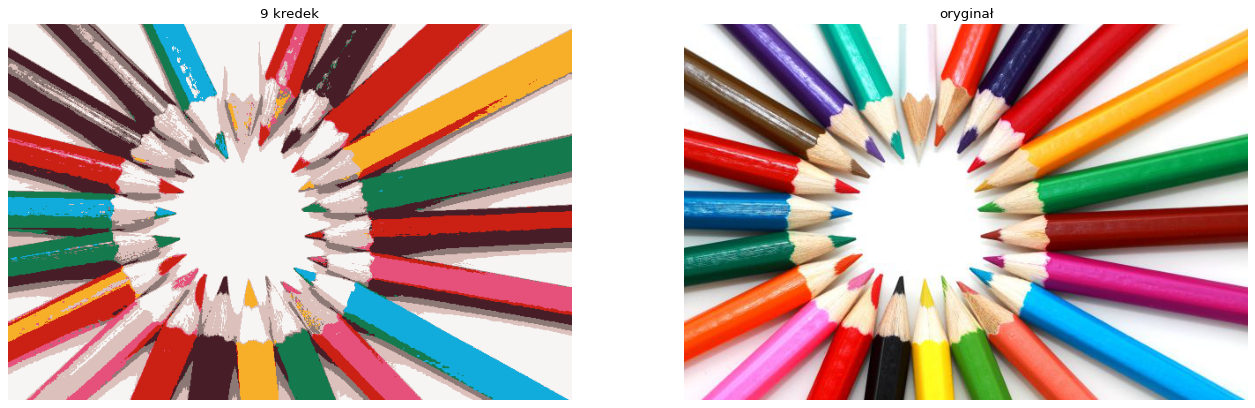

In [71]:
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 2, 1)
plt.imshow(kredki9)
plt.axis('off')
plt.title('9 kredek')
plt.subplot(1, 2, 2)
plt.imshow(kredki)
plt.axis('off')
plt.title('oryginał')
plt.show()

<b>Wybrana ilość Kredek ze względu na Indeks sylwetki</b>

In [55]:
km = KMeans(n_clusters=6, random_state=0).fit(kredki_flat)

In [56]:
kredki_flat6 = kredki_flat.copy()

In [57]:
for i in np.unique(km.labels_):
    kredki_flat6[km.labels_ == i, :] = km.cluster_centers_[i]
kredki6 = kredki_flat6.reshape(kredki.shape)

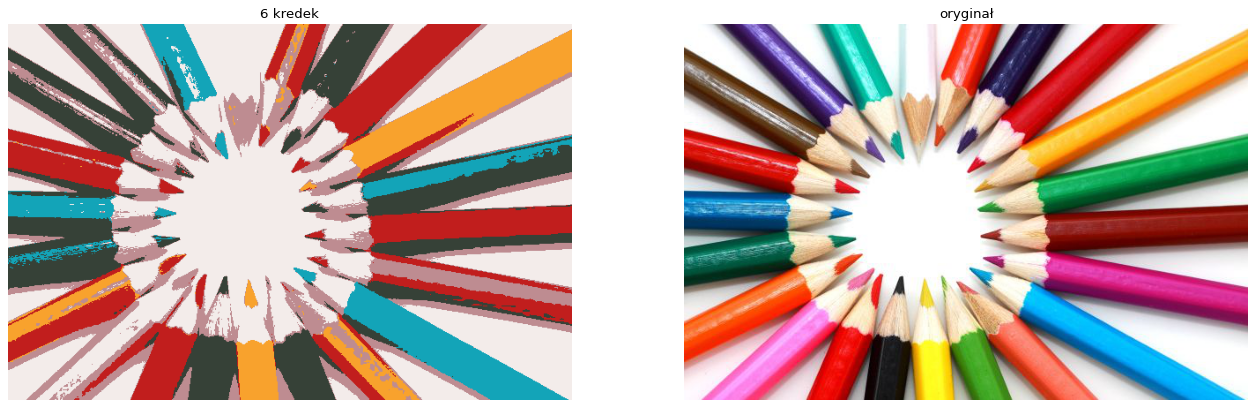

In [72]:
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 2, 1)
plt.imshow(kredki6)
plt.axis('off')
plt.title('6 kredek')
plt.subplot(1, 2, 2)
plt.imshow(kredki)
plt.axis('off')
plt.title('oryginał')
plt.show()

Subiektywnie lepszym wyborem wydaje się 9 kredek czyli wersja wybrana za pomocą wykresu Inercji.